In [0]:
!pip install -q sklearn

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
import pandas as pd
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from six.moves import urllib
from IPython.display import clear_output

import tensorflow.compat.v2.feature_column as fc

In [0]:
df_train = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
df_test = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
resu_train = df_train.pop('survived')
resu_test = df_test.pop('survived')
df_train = df_train.rename(columns = {"class": "passenger_class"}) 
df_test = df_test.rename(columns = {"class": "passenger_class"}) 


Text(0.5, 0, '%')

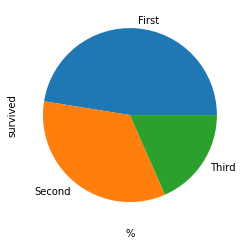

In [105]:
pd.concat([df_train, resu_train], axis = 1).groupby('passenger_class').survived.mean().plot(kind = 'pie').set_xlabel('%')


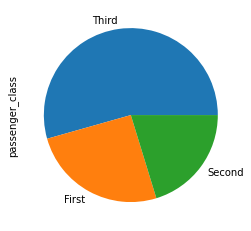

In [106]:
df_train['passenger_class'].value_counts().plot(kind = 'pie')

In [107]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'passenger_class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = df_train[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='passenger_class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.s

In [0]:
def make_input_fn(data_df, label_df, num_epochs=100, shuffle=True, batch_size=16):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(df_train, resu_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(df_test, resu_test, num_epochs=1, shuffle=False)

In [149]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpsybmvnor', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [150]:
linear_est.train(train_input_fn)             # train
result = linear_est.evaluate(ev al_input_fn)  # get model metrics/stats by testing on tetsing data
clear_output()                               # clears consoke output
print(result['accuracy']) 

0.77272725


In [143]:
result = list(linear_est.predict(eval_input_fn))
person = 50
print(result[person]['probabilities'][1], "% Probability\n" + str(df_test.loc[person]),"\nSurvived:" + str(resu_test[person]))


INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpu8km4d27/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.09981084 % Probability
sex                         male
age                           40
n_siblings_spouses             1
parch                          1
fare                        15.5
passenger_class            Third
deck            